## Práctica de muestreo simple y estratificado.

### Cargamos las bibliotecas a utilizar

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Cargamos los datos a analizar

In [ ]:
ruta = "https://raw.githubusercontent.com/vbatiz/intro-python/main/notebooks/data/titanic.csv"
df_titanic = pd.read_csv(ruta)
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Revisión de los tipos de datos

In [ ]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
df_titanic.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df_titanic.shape

(891, 12)

### Visualización gráfica de datos

Sex
male      577
female    314
Name: count, dtype: int64


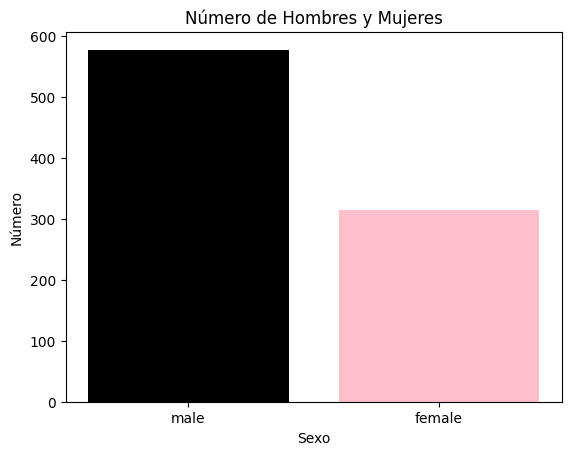

In [ ]:
contador_genero = df_titanic.Sex.value_counts()
print(contador_genero)
plt.bar(contador_genero.index,contador_genero.values, color=["black","pink"])
plt.xlabel("Sexo")
plt.ylabel("Número")
plt.title("Número de Hombres y Mujeres")
plt.show()

In [ ]:
# Creamos una función para visualizar los datos en una gráfica de barras
def visualizar(df, columna, titulo, etiqueta_x, etiqueta_y):
  contador_genero = df[columna].value_counts()
  #print(contador_genero)
  plt.bar(contador_genero.index,contador_genero.values, color=["black","pink"])
  plt.xlabel(etiqueta_x)
  plt.ylabel(etiqueta_y)
  plt.title(titulo)
  plt.show()

### Muestreo simple.

Sex
male      64
female    36
Name: count, dtype: int64


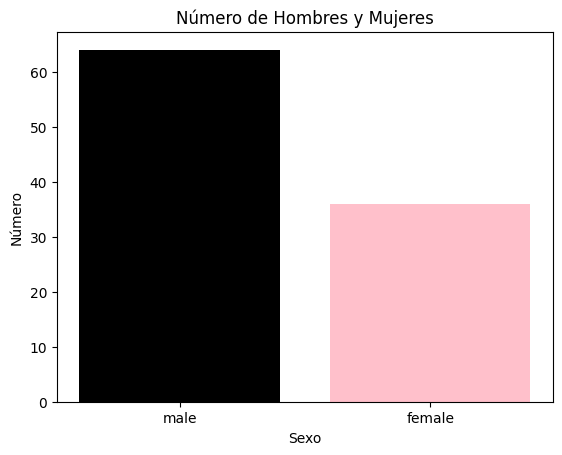

In [ ]:
np.random.seed(0)  #Fijamos la semilla por reproducibilidad
numero_muestras = 100 #Número de elementos a solicitar
muestra_aleatoria = df_titanic.sample(numero_muestras)
print(muestra_aleatoria.Sex.value_counts())
#print(muestra_aleatoria)
visualizar(muestra_aleatoria,"Sex","Número de Hombres y Mujeres","Sexo","Número")

### Muestreo estratificado.

Sex
male      100
female    100
Name: count, dtype: int64


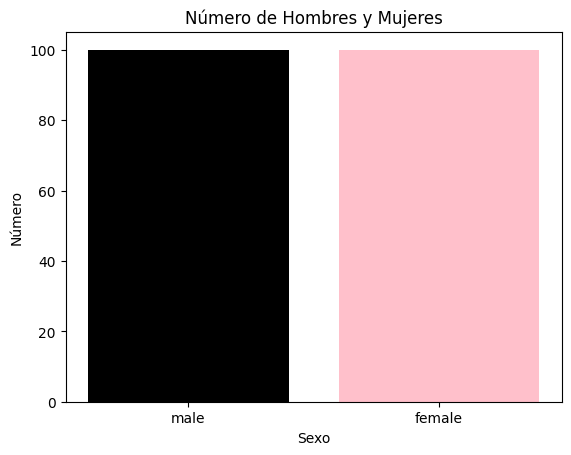

In [ ]:
np.random.seed(0)  #Fijamos la semilla por reproducibilidad
numero_muestras = 100 #Número de elementos a solicitar

def muestreo_estratificado(grupo):
  return grupo.sample(numero_muestras)

muestra_estratificada = df_titanic.groupby("Sex",group_keys=False,sort=False).apply(muestreo_estratificado)

print(muestra_estratificada.Sex.value_counts())

#print(muestra_aleatoria)
visualizar(muestra_estratificada,"Sex","Número de Hombres y Mujeres","Sexo","Número")